For a given trading day $t$ and an allocation $S$, let:

- $M$ : the number of assets in the universe  
- $w,{S,t} = (w_{S,t,1},w_{S,t,2}, \dots, w_{S,t,N})$ :  be the weights of allocation $S$ at time $t$
- $r_{i,t+1}$ : the performance (or return) of asset $i$ from day $t$ to day $t+1$  

Then the realized return of allocation $S$ at $t+1$ is given by:

$$
R_{S,t+1} = \sum_{i=1}^M w_{S,t,i} \times r_{i,t+1}
$$

The prediction task is to estimate the sign of $R_{S,t+1}$.


In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## `X_train.csv`

At every day $t$, each allocation $S$ follows this property:

$$
\forall S,  \forall t : \ \sum_{i=1}^M |w_{S,t,i} |
$$

The **SIGNED\_VOLUME** of an allocation $S$ at $t$ is given by:

$$
V_{S,t} = \sum_{i=1}^M w_{S,t,i} \times v_{i,t}
$$

where $v_{i,t}$ is the traded volume of stock $i$ during the trading session at timestamp $t$.


For homogeneity, these $V_{S,t}$ were rescaled in a rolling fashion to ensure comparability across different styles of allocations.

The **AVG\_DAILY\_TURNOVER** of an allocation $S$ at $t$ is given by:

$$
TURNOVER_{S,t} = \sum_{i=1}^M | w_{S,t,i} - w_{S,t-1,i} |
$$

$ADT_{S,t} = median(TURNOVER_{S,t} , \dots, TURNOVER_{S,t-20} )$

In [18]:
X_train = pd.read_csv("data/X_train.csv")
X_train.head()

,ROW_ID,TS,ALLOCATION,RET_20,RET_19,RET_18,RET_17,RET_16,RET_15,RET_14,...,SIGNED_VOLUME_9,SIGNED_VOLUME_8,SIGNED_VOLUME_7,SIGNED_VOLUME_6,SIGNED_VOLUME_5,SIGNED_VOLUME_4,SIGNED_VOLUME_3,SIGNED_VOLUME_2,SIGNED_VOLUME_1,AVG_DAILY_TURNOVER
0,0,DATE_0001,ALLOCATION_01,-0.002477,0.004826,0.005374,-0.001688,-0.000152,-0.000685,-0.002217,...,-1.016154,-1.011450,-1.171714,-0.729594,-1.208138,-1.215123,-0.848346,-0.642461,-0.203447,0.054324
1,1,DATE_0001,ALLOCATION_02,0.006863,-0.005265,-0.004249,0.002686,-0.002638,0.003056,0.002712,...,0.896098,1.429419,0.946527,1.059767,0.988289,0.956915,0.943508,0.124168,0.081083,0.015669
2,2,DATE_0001,ALLOCATION_03,-0.005535,0.008541,0.005360,-0.002491,0.004679,-0.000848,-0.007197,...,-0.889142,-0.939257,-0.980370,-0.863196,-0.839662,-0.882459,-1.172723,-0.863937,-0.695998,0.057961
3,3,DATE_0001,ALLOCATION_04,0.003178,-0.001352,-0.004051,-0.001841,-0.005659,0.000627,0.006686,...,-1.788263,-0.807971,-1.587942,-0.042083,-1.356051,-1.007006,-1.821786,-0.455660,-1.090989,0.096004
4,4,DATE_0001,ALLOCATION_05,0.003359,-0.003349,-0.005460,0.000416,-0.003533,0.000913,0.005088,...,0.326148,1.013100,0.362135,0.774670,0.370484,-0.132558,-0.417645,-1.284208,-1.382900,0.005816


Truc à faire : 
- Sharpe Ratio : pas assez de données. 

Chercher des règles simples : 
- Quelques derniers r / 

RET VS Signed Volume ? 

XGBoost --> RF C MORT 

In [83]:
X_train.columns

Index(['ROW_ID', 'TS', 'ALLOCATION', 'RET_20', 'RET_19', 'RET_18', 'RET_17',
       'RET_16', 'RET_15', 'RET_14', 'RET_13', 'RET_12', 'RET_11', 'RET_10',
       'RET_9', 'RET_8', 'RET_7', 'RET_6', 'RET_5', 'RET_4', 'RET_3', 'RET_2',
       'RET_1', 'SIGNED_VOLUME_20', 'SIGNED_VOLUME_19', 'SIGNED_VOLUME_18',
       'SIGNED_VOLUME_17', 'SIGNED_VOLUME_16', 'SIGNED_VOLUME_15',
       'SIGNED_VOLUME_14', 'SIGNED_VOLUME_13', 'SIGNED_VOLUME_12',
       'SIGNED_VOLUME_11', 'SIGNED_VOLUME_10', 'SIGNED_VOLUME_9',
       'SIGNED_VOLUME_8', 'SIGNED_VOLUME_7', 'SIGNED_VOLUME_6',
       'SIGNED_VOLUME_5', 'SIGNED_VOLUME_4', 'SIGNED_VOLUME_3',
       'SIGNED_VOLUME_2', 'SIGNED_VOLUME_1', 'AVG_DAILY_TURNOVER'],
      dtype='object')

In [81]:
180245 / 65

2773.0

In [20]:
X_train.columns

Index(['ROW_ID', 'TS', 'ALLOCATION', 'RET_20', 'RET_19', 'RET_18', 'RET_17',
       'RET_16', 'RET_15', 'RET_14', 'RET_13', 'RET_12', 'RET_11', 'RET_10',
       'RET_9', 'RET_8', 'RET_7', 'RET_6', 'RET_5', 'RET_4', 'RET_3', 'RET_2',
       'RET_1', 'SIGNED_VOLUME_20', 'SIGNED_VOLUME_19', 'SIGNED_VOLUME_18',
       'SIGNED_VOLUME_17', 'SIGNED_VOLUME_16', 'SIGNED_VOLUME_15',
       'SIGNED_VOLUME_14', 'SIGNED_VOLUME_13', 'SIGNED_VOLUME_12',
       'SIGNED_VOLUME_11', 'SIGNED_VOLUME_10', 'SIGNED_VOLUME_9',
       'SIGNED_VOLUME_8', 'SIGNED_VOLUME_7', 'SIGNED_VOLUME_6',
       'SIGNED_VOLUME_5', 'SIGNED_VOLUME_4', 'SIGNED_VOLUME_3',
       'SIGNED_VOLUME_2', 'SIGNED_VOLUME_1', 'AVG_DAILY_TURNOVER'],
      dtype='object')

In [21]:
X_train["TS"].unique()

array(['DATE_0001', 'DATE_0002', 'DATE_0003', ..., 'DATE_2771',
       'DATE_2772', 'DATE_2773'], shape=(2773,), dtype=object)

In [22]:
X_train["ALLOCATION"].unique()

array(['ALLOCATION_01', 'ALLOCATION_02', 'ALLOCATION_03', 'ALLOCATION_04',
       'ALLOCATION_05', 'ALLOCATION_06', 'ALLOCATION_07', 'ALLOCATION_08',
       'ALLOCATION_09', 'ALLOCATION_10', 'ALLOCATION_11', 'ALLOCATION_12',
       'ALLOCATION_13', 'ALLOCATION_14', 'ALLOCATION_15', 'ALLOCATION_16',
       'ALLOCATION_17', 'ALLOCATION_18', 'ALLOCATION_19', 'ALLOCATION_20',
       'ALLOCATION_21', 'ALLOCATION_22', 'ALLOCATION_23', 'ALLOCATION_24',
       'ALLOCATION_25', 'ALLOCATION_26', 'ALLOCATION_27', 'ALLOCATION_28',
       'ALLOCATION_29', 'ALLOCATION_30', 'ALLOCATION_31', 'ALLOCATION_32',
       'ALLOCATION_33', 'ALLOCATION_34', 'ALLOCATION_35', 'ALLOCATION_36',
       'ALLOCATION_37', 'ALLOCATION_38', 'ALLOCATION_39', 'ALLOCATION_40',
       'ALLOCATION_41', 'ALLOCATION_42', 'ALLOCATION_43', 'ALLOCATION_44',
       'ALLOCATION_45', 'ALLOCATION_46', 'ALLOCATION_47', 'ALLOCATION_48',
       'ALLOCATION_49', 'ALLOCATION_50', 'ALLOCATION_51', 'ALLOCATION_52',
       'ALLOCATION_53', '

Be careful no continuity in the dates

In [23]:
X_train[X_train["ALLOCATION"] == "ALLOCATION_01"][["TS", "RET_1", "RET_2"]]

,TS,RET_1,RET_2
0,DATE_0001,0.001061,0.004822
65,DATE_0002,0.003451,-0.000827
130,DATE_0003,0.001105,0.000013
195,DATE_0004,0.001886,0.000974
260,DATE_0005,0.001579,0.004163
...,...,...,...
179920,DATE_2769,-0.001257,0.003040
179985,DATE_2770,-0.003350,0.000868
180050,DATE_2771,-0.002333,-0.000563
180115,DATE_2772,-0.001352,-0.000667


## `y_train.csv`

In [24]:
y_train = pd.read_csv("data/y_train.csv")
y_train.head()

,ROW_ID,target
0,0,0.000962
1,1,-0.002046
2,2,0.001630
3,3,-0.001154
4,4,-0.001860


In [25]:
y_train.shape

(180245, 2)

In [26]:
X_test = pd.read_csv("data/X_test.csv")
X_test.head()

,ROW_ID,TS,ALLOCATION,RET_20,RET_19,RET_18,RET_17,RET_16,RET_15,RET_14,...,SIGNED_VOLUME_9,SIGNED_VOLUME_8,SIGNED_VOLUME_7,SIGNED_VOLUME_6,SIGNED_VOLUME_5,SIGNED_VOLUME_4,SIGNED_VOLUME_3,SIGNED_VOLUME_2,SIGNED_VOLUME_1,AVG_DAILY_TURNOVER
0,180245,DATE_2774,ALLOCATION_01,-0.006869,-0.001703,-0.003348,-0.003129,-0.003368,-0.002515,-0.001182,...,1.467264,1.114890,1.227472,0.835403,1.571033,0.946056,1.691493,3.561658,0.038297,0.010310
1,180246,DATE_2774,ALLOCATION_02,-0.002409,-0.000763,0.001349,-0.002069,-0.000147,0.002263,-0.004348,...,0.212862,0.571286,0.711297,0.815702,-0.102490,0.969315,1.738142,5.400385,2.127508,0.013252
2,180247,DATE_2774,ALLOCATION_03,-0.004936,-0.001041,-0.004108,-0.002354,-0.003627,0.000263,0.001072,...,1.165160,1.004918,1.159257,1.110129,1.473592,1.013560,1.622486,2.346189,0.676293,0.013975
3,180248,DATE_2774,ALLOCATION_04,-0.008992,-0.000644,0.001352,-0.004524,-0.004002,-0.004404,0.000524,...,1.557001,1.156245,1.688199,0.553323,2.060668,0.746113,2.300634,5.564923,-0.637974,0.017026
4,180249,DATE_2774,ALLOCATION_05,-0.002797,-0.001686,0.002453,-0.000645,0.000615,-0.000624,-0.004374,...,0.135133,0.115105,0.344619,0.312612,0.932051,0.335749,1.021416,2.351529,0.030891,0.006701


In [27]:
X_test.shape

(7735, 44)

In [28]:
59 / 7735

0.007627666451195863

In [29]:
train = pd.read_csv("data/train.csv")

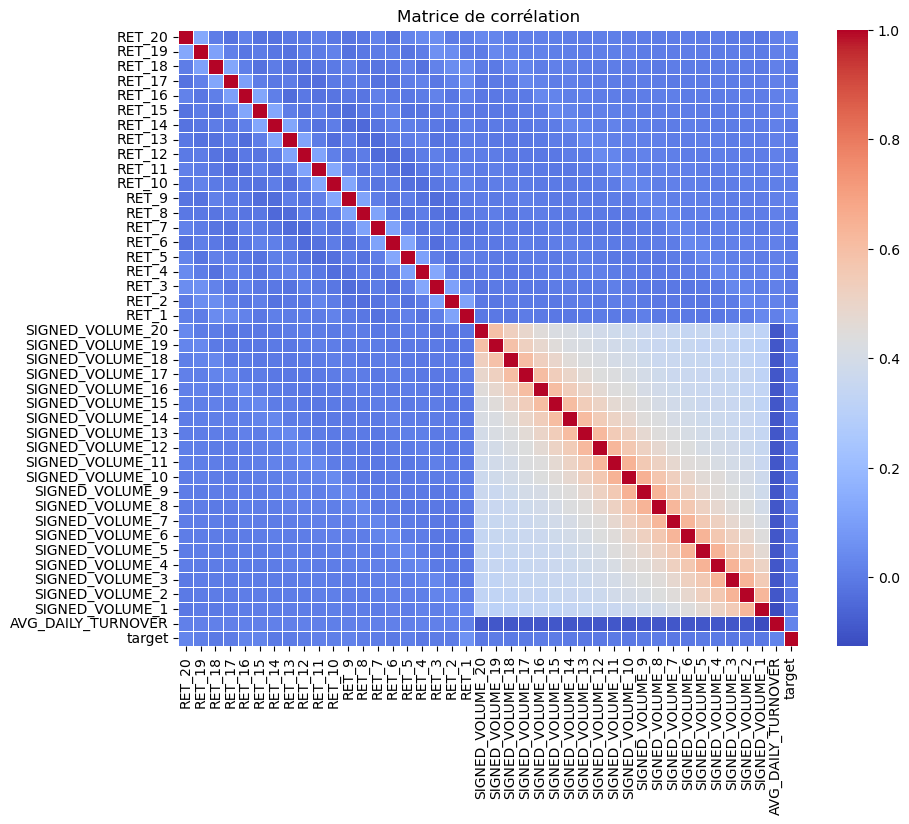

In [30]:
corr = train[
    [col for col in train.columns if col not in ["ROW_ID", "TS", "ALLOCATION"]]
].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=False, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matrice de corrélation")
plt.show()

In [15]:
train.groupby("ALLOCATION")[
    [f"SIGNED_VOLUME_{i}" for i in range(1, 21)]
].mean().T.corr()

ALLOCATION,ALLOCATION_01,ALLOCATION_02,ALLOCATION_03,ALLOCATION_04,ALLOCATION_05,ALLOCATION_06,ALLOCATION_07,ALLOCATION_08,ALLOCATION_09,ALLOCATION_10,...,ALLOCATION_56,ALLOCATION_57,ALLOCATION_58,ALLOCATION_59,ALLOCATION_60,ALLOCATION_61,ALLOCATION_62,ALLOCATION_63,ALLOCATION_64,ALLOCATION_65
ALLOCATION,,,,,,,,,,,,,,,,,,,,,
ALLOCATION_01,1.000000,-0.358410,0.277491,0.475509,0.139926,-0.618570,0.601638,0.537960,-0.482197,-0.392044,...,0.764010,-0.586133,-0.250695,-0.496387,-0.551899,-0.590970,-0.421897,-0.505180,-0.271640,0.581228
ALLOCATION_02,-0.358410,1.000000,-0.918064,-0.894535,0.493401,0.840711,-0.876421,-0.933213,0.879806,0.919818,...,-0.674362,0.899366,0.946532,-0.122929,0.888026,0.826200,0.015413,0.765510,0.932495,-0.844108
ALLOCATION_03,0.277491,-0.918064,1.000000,0.777789,-0.456569,-0.702933,0.738457,0.833687,-0.762984,-0.838159,...,0.524936,-0.782636,-0.943796,0.240527,-0.749123,-0.709558,0.034206,-0.660698,-0.900499,0.712105
ALLOCATION_04,0.475509,-0.894535,0.777789,1.000000,-0.190361,-0.965547,0.964470,0.911857,-0.932295,-0.934743,...,0.829728,-0.977540,-0.779662,-0.184380,-0.961931,-0.957053,0.070519,-0.928881,-0.854638,0.975986
ALLOCATION_05,0.139926,0.493401,-0.456569,-0.190361,1.000000,0.158421,-0.224708,-0.368666,0.347676,0.413844,...,-0.049335,0.230402,0.537835,-0.375426,0.288948,0.130284,0.067639,0.102664,0.505147,-0.143477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ALLOCATION_61,-0.590970,0.826200,-0.709558,-0.957053,0.130284,0.991276,-0.984772,-0.922249,0.880349,0.890491,...,-0.927195,0.978575,0.725644,0.316140,0.969097,1.000000,0.064747,0.890840,0.769023,-0.988090
ALLOCATION_62,-0.421897,0.015413,0.034206,0.070519,0.067639,0.064643,-0.083732,-0.154916,-0.014588,-0.070263,...,-0.231614,0.078499,-0.011010,0.230847,0.051476,0.064747,1.000000,-0.075573,-0.105234,0.019003
ALLOCATION_63,-0.505180,0.765510,-0.660698,-0.928881,0.102664,0.901715,-0.885667,-0.775205,0.883464,0.890335,...,-0.811209,0.907197,0.638462,0.366370,0.897040,0.890840,-0.075573,1.000000,0.775979,-0.910605


In [16]:
X_train.groupby("ALLOCATION")["AVG_DAILY_TURNOVER"].describe().drop(
    columns=["count"]
).sort_values(by=["std"]).describe()

,mean,std,min,25%,50%,75%,max
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,0.090553,0.013154,0.064464,0.082070,0.089170,0.097234,0.144999
std,0.211927,0.016869,0.186887,0.206042,0.212129,0.218328,0.243219
min,0.000815,0.000622,0.000060,0.000495,0.000629,0.000875,0.009137
25%,0.006064,0.003720,0.001548,0.002510,0.003351,0.006256,0.032395
50%,0.019508,0.008121,0.008319,0.015122,0.017161,0.022091,0.058248
75%,0.049142,0.015115,0.027225,0.040620,0.049424,0.058676,0.149633
max,1.451394,0.109487,1.353655,1.433169,1.452439,1.470664,1.580719


In [34]:
(corr["target"].drop("target") * 100).sort_values()

SIGNED_VOLUME_3      -1.130507
SIGNED_VOLUME_1      -0.976983
SIGNED_VOLUME_10     -0.870340
SIGNED_VOLUME_6      -0.843548
SIGNED_VOLUME_13     -0.784978
SIGNED_VOLUME_20     -0.730442
SIGNED_VOLUME_12     -0.688615
RET_4                -0.664031
SIGNED_VOLUME_2      -0.645765
SIGNED_VOLUME_7      -0.624106
SIGNED_VOLUME_9      -0.591661
SIGNED_VOLUME_11     -0.534279
RET_14               -0.482457
SIGNED_VOLUME_4      -0.401121
SIGNED_VOLUME_17     -0.369716
SIGNED_VOLUME_5      -0.328013
RET_6                -0.278981
SIGNED_VOLUME_14     -0.264289
SIGNED_VOLUME_18     -0.226384
RET_18               -0.192645
RET_2                -0.061279
SIGNED_VOLUME_8      -0.037986
SIGNED_VOLUME_19      0.002221
RET_17                0.018524
SIGNED_VOLUME_16      0.022966
SIGNED_VOLUME_15      0.056684
RET_12                0.130020
RET_3                 0.199968
RET_13                0.222732
RET_8                 0.403937
RET_7                 0.571627
RET_10                0.734730
RET_5   

In [35]:
import feature_engineering as fe


# %%
RET_features = [f"RET_{i}" for i in range(1, 20)]
SIGNED_VOLUME_features = [f"SIGNED_VOLUME_{i}" for i in range(1, 20)]
TURNOVER_features = ["AVG_DAILY_TURNOVER"]

window_sizes = [1, 3, 5, 10, 15, 20]


def feature_engineering(
    X: pd.DataFrame,
) -> pd.DataFrame:
    X = (
        X.pipe(
            fe.add_mulitiply_col,
            RET_features=RET_features,
            SIGNED_VOLUME_features=SIGNED_VOLUME_features,
        )
        .pipe(
            fe.add_average_perf_features,
            RET_features=RET_features,
            window_sizes=window_sizes,
            group_col="TS",
        )
        .pipe(
            fe.add_statistical_features,
            RET_features=RET_features,
            SIGNED_VOLUME_features=SIGNED_VOLUME_features,
        )
        .pipe(
            fe.add_average_volume_features,
            SIGNED_VOLUME_features=SIGNED_VOLUME_features,
        )
        # .pipe(fe.add_cross_sectional_features, base_cols=["RET_1", "RET_3"])
    )

    return X


X_feat = feature_engineering(train)

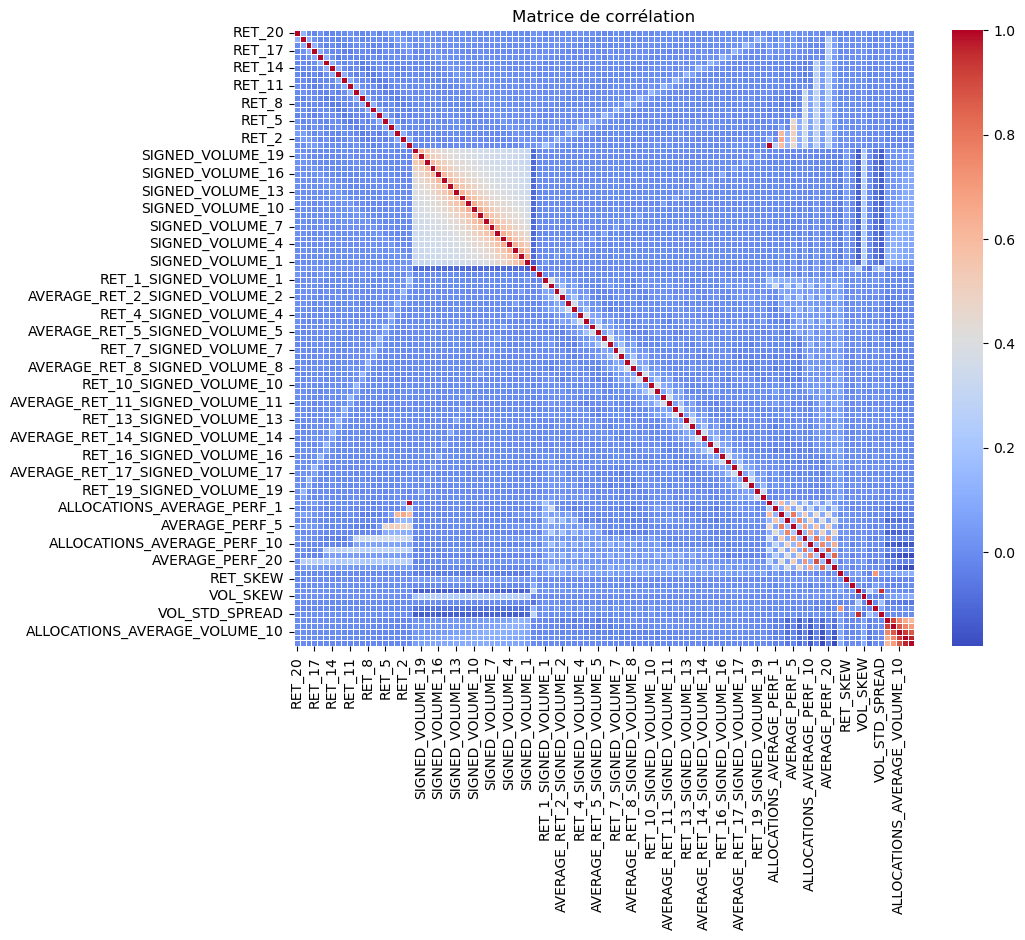

In [36]:
corr = X_feat[
    [col for col in X_feat.columns if col not in ["ROW_ID", "TS", "ALLOCATION"]]
].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=False, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matrice de corrélation")
plt.show()

In [45]:
(corr["target"].drop("target") * 100).abs().sort_values().tail(20)

ALLOCATIONS_AVERAGE_PERF_20        1.128682
SIGNED_VOLUME_3                    1.130507
AVERAGE_RET_19_SIGNED_VOLUME_19    1.230828
RET_11                             1.397525
ALLOCATIONS_AVERAGE_PERF_15        1.532592
RET_9                              1.605186
AVERAGE_RET_14_SIGNED_VOLUME_14    1.746854
ALLOCATIONS_AVERAGE_PERF_3         1.782474
ALLOCATIONS_AVERAGE_PERF_5         1.890985
RET_15                             2.131445
RET_16                             2.308583
AVG_DAILY_TURNOVER                 2.368849
RET_20                             2.491265
AVERAGE_PERF_5                     2.574299
AVERAGE_PERF_10                    2.753566
AVERAGE_PERF_15                    3.126398
AVERAGE_PERF_3                     3.247016
AVERAGE_PERF_20                    3.440613
RET_1                              6.016907
AVERAGE_PERF_1                     6.016907
Name: target, dtype: float64

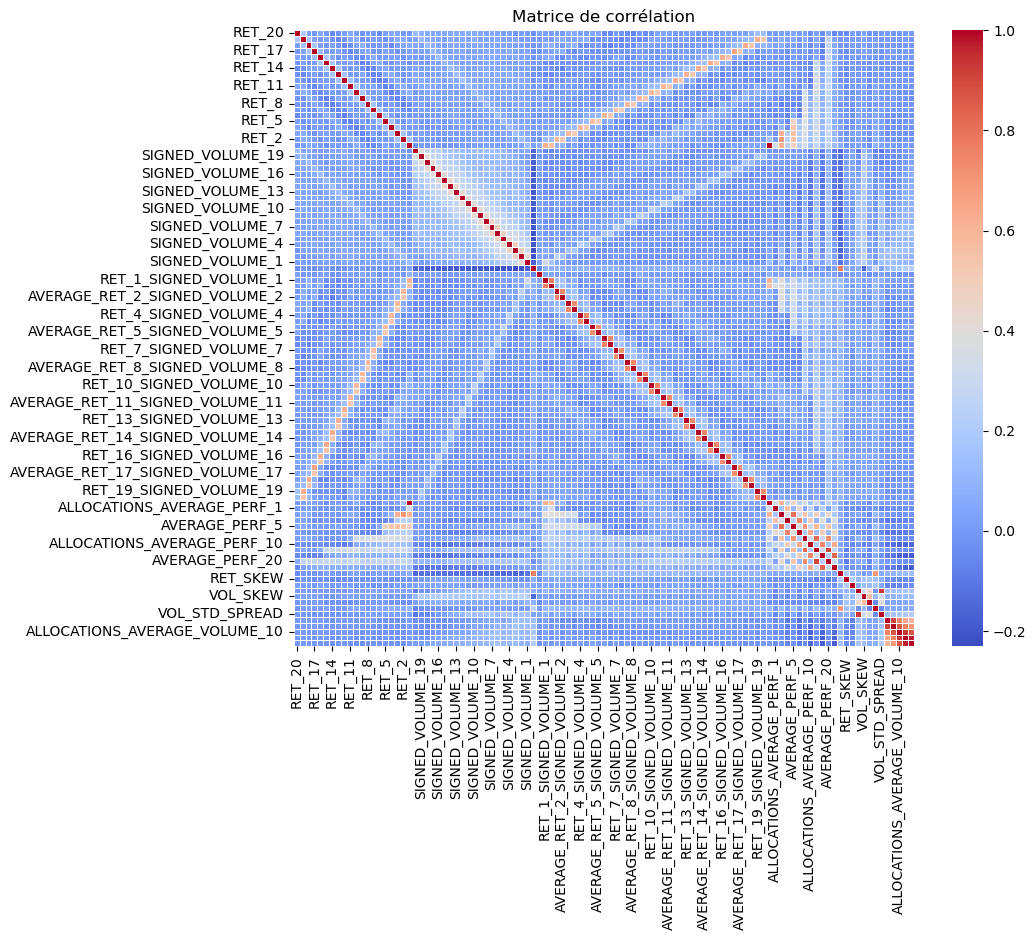

In [51]:
corr = X_feat[X_feat["ALLOCATION"] == "ALLOCATION_02"][
    [col for col in X_feat.columns if col not in ["ROW_ID", "TS", "ALLOCATION"]]
].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=False, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matrice de corrélation")
plt.show()

In [63]:
allocation = "ALLOCATION_02"

corr = X_feat[X_feat["ALLOCATION"] == allocation][
    [col for col in X_feat.columns if col not in ["ROW_ID", "TS", "ALLOCATION"]]
].corr()

(corr["target"].drop("target") * 100).abs().sort_values(ascending=False).head(10).index

Index(['RET_1', 'AVERAGE_PERF_1', 'RET_9_SIGNED_VOLUME_9', 'AVERAGE_PERF_10',
       'AVERAGE_PERF_15', 'AVG_DAILY_TURNOVER', 'RET_9', 'AVERAGE_PERF_20',
       'AVERAGE_PERF_5', 'AVERAGE_PERF_3'],
      dtype='object')

In [71]:
from statsmodels.tsa.stattools import ccf

alloc1 = train[train["ALLOCATION"] == "ALLOCATION_01"].reset_index(drop=True)
alloc2 = train[train["ALLOCATION"] == "ALLOCATION_02"].reset_index(drop=True)
corr_x_y = []
for i in range(len(alloc1)):
    x = alloc1.iloc[i]  # variable 1
    y = alloc2.iloc[i]  # variable 2
    cross_corr = ccf(x[RET_features], y[RET_features])  # jusqu'à 20 lags

cross_corr

array([-0.54177222, -0.40811335,  0.08768545, -0.27770507,  0.34618229,
        0.24686776,  0.19443391, -0.0916751 ,  0.17217541, -0.50695071,
       -0.0442346 , -0.03910423,  0.15317413, -0.13725721,  0.27229672,
        0.62110876,  0.29999645,  0.49792145, -0.99681701])

In [76]:
train.shape

(162955, 45)